## PROJECT-1. Анализ резюме из HeadHunter

### Исследование структуры данных.
1. Прочитайте данные с помощью библиотеки Pandas. Перед чтением обратите внимание на разделитель внутри файла.

- Чему равна размерность таблицы? Введите её в виде кортежа (число строк, число столбцов).


In [6]:
import pandas as pd
import numpy as np
hh_data = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')
print(f'Размерность таблицы составляет: {hh_data.shape}')
change_data = pd.read_csv('data/ExchangeRates.csv', sep=',')


Размерность таблицы составляет: (44744, 12)


2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

- В каком формате представлен порядок слов в признаке «Пол, возраст»?

In [7]:
display(hh_data.head(3))

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано


In [8]:
format_str = hh_data.loc[[177], ['Пол, возраст']]
print(f'Порядок слов в признаке "Пол, возраст" представлен в формате: {format_str}')

Порядок слов в признаке "Пол, возраст" представлен в формате:                                       Пол, возраст
177  Мужчина ,  42 года , родился 25 сентября 1976


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

- Какой тип данных имеют все столбцы? Введите его в поле для ответа.

In [9]:
display(hh_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

None

4. Обратите внимание на информацию о числе непустых значений.

- Выберите все признаки, в которых есть пропуски в данных:

In [10]:
display(hh_data.isna().sum())

Пол, возраст                         0
ЗП                                   0
Ищет работу на должность:            0
Город, переезд, командировки         0
Занятость                            0
График                               0
Опыт работы                        168
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Образование и ВУЗ                    0
Обновление резюме                    0
Авто                                 0
dtype: int64

5. Выведите основную статистическую информацию о столбцах.

- Сколько уникальных значений содержится в столбце «Опыт работы»?
- Какая из искомых должностей самая распространённая? Введите название.

In [11]:
display(hh_data.describe())

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


In [12]:
exp = hh_data['Опыт работы'].nunique()
print(f'В столбце "Опыт работы" содержится {exp} уникальных значений.')
job = hh_data['Ищет работу на должность:'].mode()[0]
print(f'Самая распространенная должность: {job}.')

В столбце "Опыт работы" содержится 44413 уникальных значений.
Самая распространенная должность: Системный администратор.


### Преобразование данных.

1. Начнём с простого — с признака «Образование и ВУЗ». Его текущий формат — это: <Уровень образования год выпуска ВУЗ специальность...>. Например:

Высшее образование 2016 Московский авиационный институт (Национальный исследовательский университет)
Неоконченное высшее образование 2000 Балтийская государственная академия рыбопромыслового флота
Нас будет интересовать только уровень образования. Причём, для простоты мы будем считать, что соискатель указывает свой максимальный уровень образования в первых трёх словах столбца “Образование и ВУЗ”.

Создайте с помощью функции-преобразования новый признак «Образование», который должен иметь четыре категории: «высшее», «неоконченное высшее», «среднее специальное» и «среднее».

Выполните преобразование, ответьте на контрольные вопросы и удалите признак «Образование и ВУЗ».

- Сколько соискателей имеет средний уровень образования (школьное образование)?

In [13]:
# функция для извлечения из признака "Образование и ВУЗ" категории об образовании
def get_education(arg):
    arg = ' '.join(arg.split(' ')[:3])
    if 'Высшее' in arg:
        return 'высшее'
    elif 'Неоконченное высшее' in arg:
        return 'неоконченное высшее'
    elif 'Среднее специальное' in arg:
        return 'среднее специальное'
    elif 'Среднее образование' in arg:
        return 'среднее'
    
# создание нового признака "Образовние" и заполнение нового признака категорией об образовании из признака "Образование и ВУЗ"
hh_data['Образование'] = hh_data['Образование и ВУЗ'].apply(get_education)

# удалание признака "Образование и ВУЗ"
hh_data = hh_data.drop('Образование и ВУЗ', axis=1)

# нахождение числа соискателей имеющих среднее образование
edc = hh_data['Образование'].value_counts().loc['среднее']
print(f'Средний уровень образования имеют {edc} соискателей.')

Средний уровень образования имеют 559 соискателей.


2. Теперь нас интересует столбец «Пол, возраст». Его текущий формат: <Пол , возраст, дата рождения>. Например:

Мужчина , 39 лет , родился 27 ноября 1979
Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец..

Создайте два новых признака «Пол» и «Возраст». При этом важно учесть:

Признак пола должен иметь два уникальных строковых значения: М — мужчина, Ж — женщина.
Признак возраста должен быть представлен целыми числами.
Выполните преобразование, ответьте на контрольные вопросы и удалите признак «Пол, возраст» из таблицы.

- Сколько процентов женских резюме представлено в наших данных? Ответ округлите до сотых.
- Чему равен средний возраст соискателей? Ответ округлите до десятых.

In [14]:
# функция для извлечения из признака "Пол, возраст" информацией о гендерности
def get_sex(arg):
    arg = ' '.join(arg.split(' ')[:1])
    if 'Мужчина' in arg:
        return 'М'
    elif 'Женщина' in arg:
        return 'Ж'
    
# создание нового признака "Пол" и заполнение нового признака информацией о гендерности из признака "Пол, возраст"
hh_data['Пол'] = hh_data['Пол, возраст'].apply(get_sex)

# расчет процента женских резюме
female_sum = hh_data[hh_data['Пол'] == 'Ж']['Пол'].count()
female = np.round(female_sum * 100 / hh_data['Пол'].count(), decimals = 2) 
print(f'В данных {female}% представленно женских резюме.')

# функция для извлечения из признака "Пол, возраст" информацией о возрасте
def get_age(age):
    age_list = ' '.join(age.split(' ')[3:4])
    return age_list

# создание нового признака "Возраст" и заполнение нового признака информацией о возрасте из признака "Пол, возраст"
hh_data['Возраст'] = hh_data['Пол, возраст'].apply(get_age)

# приведение признака "Возраст" к типу int
hh_data = hh_data.astype({'Возраст': int})

# Расчет среднего возраста соискателя
age = np.round(hh_data['Возраст'].mean(), decimals = 1)
print(f'Средний возраст соискателя равен {age} лет.')

#Удаление признака "Пол, возраст"
hh_data = hh_data.drop('Пол, возраст', axis=1)

В данных 19.07% представленно женских резюме.
Средний возраст соискателя равен 32.2 лет.


3. Следующим этапом преобразуем признак «Опыт работы». Его текущий формат: <Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>.

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовём «Опыт работы (месяц)».

Для начала обсудим условия решения задачи:

Во-первых, в данном признаке есть пропуски. Условимся, что, если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN).

Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значение Не указано. Их тоже обозначим как NaN (функция-преобразование возвращает NaN)

В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях).

В-четвёртых, у нас есть проблема: опыт работы может быть представлен только в годах или только в месяцах. Например, можно встретить следующие варианты:

> Опыт работы 3 года 2 месяца

> Опыт работы 4 года

> Опыт работы 11 месяцев

> Учитывайте эту особенность в вашем коде.

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.

Выполните преобразование и удалите столбец «Опыт работы» из таблицы.

- Чему равен медианный опыт работы (в месяцах) в нашей таблице?

In [15]:
# функция для расчета стажа работы в месяцах
def get_work(arg):
    if arg is np.nan or arg == 'Не указано':
        return np.nan
    months = ['месяц', 'месяцев', 'месяца']
    years = ['год', 'лет', 'года']
    counter = 0
    args_splited = arg.split(' ')[1:7]
    for i, j in enumerate(args_splited):
        if j in years:
            counter += int(args_splited[i-1]) * 12
        if j in months:
            counter += int(args_splited[i-1])
    return counter

# создание нового признака "Опыт работы (месяц)" и заполнение данными из признака "Опыт работы"
hh_data['Опыт работы (месяц)'] = hh_data['Опыт работы'].apply(get_work)

# Удаление признака "Опыт работы"
hh_data = hh_data.drop('Опыт работы', axis=1)

# Расчет медианного значения опыта работы
work_month = round(hh_data['Опыт работы (месяц)'].median())
print(f'Медианный опыт работы составляет {work_month} месяцев.')

Медианный опыт работы составляет 100 месяцев.


4. Следующий на очереди — признак «Город, переезд, командировки». Информация в нём представлена в следующем виде: <Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>.

В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

Москва , не готов к переезду , готов к командировкам
Москва , м. Беломорская , не готов к переезду, не готов к командировкам
Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам
Создадим отдельные признаки «Город», «Готовность к переезду», «Готовность к командировкам». При этом важно учесть:

⛏ Признак «Город» может содержать только четыре категории: «Москва», «Санкт-Петербург» и «город-миллионник» (их список ниже), остальные обозначьте как «другие».

Список городов-миллионников
Информация о метро, рядом с которым проживает соискатель, нас не интересует.

⛏ Признак «Готовность к переезду» должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке «Город, переезд, командировки». Например:

… , готов к переезду , …
… , не готова к переезду , …
… , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
… , хочу переехать (США) , …
Нас интересует только сам факт возможности/желания переезда.

⛏ Признак «Готовность к командировкам» должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке «Город, переезд, командировки». Например:

… , готов к командировкам , …
… , готова к редким командировкам , …
… , не готов к командировкам , …
Нас интересует только сам факт готовности к командировке.

Ещё один важный момент: при выгрузке данных у некоторых соискателей «потерялась» информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.

Выполните преобразования и удалите столбец «Город, переезд, командировки» из таблицы.
- Сколько процентов соискателей живут в Санкт-Петербурге? Ответ округлите до целого.
- Сколько процентов соискателей готовы одновременно и к переездам, и к командировкам? Ответ округлите до целого.

In [16]:
# функция для извлечения из признака "Город, переезд, командировки" информации о городе
def get_city(arg):
    arg = ' '.join(arg.split(' ')[:1])
    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград']
    if 'Москва' in arg:
        return 'Москва'
    elif 'Санкт-Петербург' in arg:
        return 'Санкт-Петербург'
    elif arg in million_cities:
        return 'город-миллионник'
    else:
        return 'другие'
    
# создание нового признака "Город" и заполнение данными из признака "Город, переезд, командировки"   
hh_data['Город'] = hh_data['Город, переезд, командировки'].apply(get_city)

# функция для извлечения из признака "Город, переезд, командировки" информации о возможности переезда
def get_move(arg):
    arg = ' '.join(arg.split(',')[1:3])
    if 'не готов к переезду' in arg:
        return False
    elif  'не готова к переезду' in arg:
        return False
    else:
        return True
    
# создание нового признака "Готовность к переезду" и заполнение данными из признака "Город, переезд, командировки"     
hh_data['Готовность к переезду'] = hh_data['Город, переезд, командировки'].apply(get_move)

# функция для извлечения из признака "Город, переезд, командировки" информации о возможности командировок
def get_travel(arg):
    arg = ' '.join(arg.split(',')[2:5])
    if 'не готов к командировкам' in arg:
        return False
    elif 'не готова к командировкам' in arg:
        return False
    elif arg == np.nan:
        return False
    else:
        return True
    
# создание нового признака "Готовность к командировкам" и заполнение данными из признака "Город, переезд, командировки"      
hh_data['Готовность к командировкам'] = hh_data['Город, переезд, командировки'].apply(get_travel)

# Удаление признака "Город, переезд, командировки"
hh_data = hh_data.drop('Город, переезд, командировки', axis=1)

#  Расчет процента живущих в Санкт-Петербурге соискателей
spb = round(hh_data['Город'].value_counts(normalize=True).loc['Санкт-Петербург']*100)
print(f'В Санкт-Петербурге живёт {spb}% соискателей.')

# Расчет процента соискателей готовы одновременно и к переездам, и к командировкам
move = hh_data[(hh_data['Готовность к переезду']== True)&(hh_data['Готовность к командировкам'] == True)].shape[0]
move_hh_data = round(move * 100 / hh_data['Готовность к командировкам'].count())
print(f'Одновременно к переезду и командировкам готовы {move_hh_data}% соискателей.')

В Санкт-Петербурге живёт 11% соискателей.
Одновременно к переезду и командировкам готовы 32% соискателей.


5. Рассмотрим поближе признаки «Занятость» и «График».

Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтёрство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удалённая работа, вахтовый метод).

На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:

полная занятость, частичная занятость;
частичная занятость, проектная работа, волонтёрство;
полный день, удалённая работа;
вахтовый метод, гибкий график, удалённая работа, полная занятость.
Такой вариант признаков имеет множество различных комбинаций, а значит, множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-«мигалки» для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе — False.
- Сколько людей ищут проектную работу и волонтёрство (в обоих столбцах стоит True)?
- Сколько людей хотят работать вахтовым методом и с гибким графиком (в обоих столбцах стоит True)?

In [17]:
# функция для извлечения из признака "Занятость" информации о виде занятости
busy = hh_data['Занятость']
b_list = []
for i in busy:
    busy_list = i.split(', ')
    for k in busy_list:
        if k not in b_list:
            b_list.append(k)

# Применение функции, создание новых признаков и заполнение данными из признака "Занятость" 
for staff in b_list:
    hh_data[staff] = hh_data['Занятость'].apply(lambda x: staff in x)
    
# функция для извлечения из признака "График" информации о виде графике работы
chart = hh_data['График']
ch_list = []
for i in chart:
    reg_list = i.split(', ')
    for k in reg_list:
        if k not in ch_list:
            ch_list.append(k)

# Применение функции, создание новых признаков и заполнение данными из признака "График" 
for graph in ch_list:
    hh_data[graph] = hh_data['График'].apply(lambda x: graph in x)

# Расчет количества соискателей, которые ищут проектную работу и волонтёрство
project_work = hh_data[(hh_data['проектная работа']== True)&(hh_data['волонтерство'] == True)].shape[0]
print(f'Проектную работу и волонтёрство ищут {project_work} человек.')

# Количество людей, которые хотят работать вахтовым методом и с гибким графиком (в обоих столбцах стоит True)
type_work = hh_data[(hh_data['вахтовый метод']== True)&(hh_data['гибкий график'] == True)].shape[0]
print(f'Вахтовым методом и с гибким графиком хотят работать {type_work} человек.')

# Удаление признаков 'Занятость' и 'График'
hh_data = hh_data.drop(['Занятость', 'График'], axis=1)

Проектную работу и волонтёрство ищут 436 человек.
Вахтовым методом и с гибким графиком хотят работать 2311 человек.


5. Признак заработной платы «ЗП». 

В чём наша проблема? — В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он хотел бы её получать, например:
> 30 000 руб.;

> 50 000 грн.;

> 550 USD.

Нам бы хотелось видеть заработную плату в единой валюте, например в рублях. Возникает вопрос: а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации: от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако в рамках нашего проекта эти темы мы рассматривать не будем.

Поэтому просто обратимся к профильным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU: данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019: скачать её вы можете здесь.

Создайте новый DataFrame из скачанного файла. В полученной таблице нас будут интересовать столбцы:

currency — наименование валюты в ISO-кодировке;
date — дата;
proportion — пропорция;
close — цена закрытия (последний зафиксированный курс валюты на указанный день).
Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в файле с курсами валют.

Пропорция — это число, отражающее, скольким единицам валюты соответствует курс в таблице с курсами. Например для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен: 17.197 / 100 = 0.17197 руб. за 1 тенге.

Осталось только понять, откуда брать дату, по которой определяется курс. А вот же она — в признаке «Обновление резюме» содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней мы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак «ЗП (руб)» — заработная плата в рублях.

Итак, давайте обсудим возможный алгоритм преобразования.
> 1. Обновить признак "Обновление резюме" из таблицы с резюме, переведя его в формат datetime и выделив из него дату. То есть в дате обновления резюме мы намеренно отсекаем время, оставляя только дату выставления резюме. В тот же формат привести признак date из таблицы с валютами. Обратите внимание на формат даты в исходных столбцах (день-месяц-год), учтите этот факт при преобразовании.

> 2. Выделить из столбца «ЗП» сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно таблице выше.

> 3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе).

> 4. Умножить сумму желаемой заработной платы на присоединённый курс валюты (close) и разделить на пропорцию. Обратите внимание на пропуски после объединения в этих столбцах. Результат занести в новый столбец «ЗП (руб)».

Удалите исходный столбец заработной платы «ЗП» и все промежуточные столбцы, если вы их создавали.
- Чему равна желаемая медианная заработная плата соискателей в нашей таблице (в рублях)?
Ответ приведите в тысячах рублей и округлите до целого. Например, если у вас получилась медианная з/п 42 127, в качестве ответа укажите 42.

In [18]:
change_data['date'] = pd.to_datetime(change_data['date'])

hh_data['Обновление резюме'] = pd.to_datetime(hh_data['Обновление резюме'], dayfirst=True).dt.date
hh_data['Обновление резюме'] = hh_data['Обновление резюме'].astype('datetime64[ns]')

# разбивка ЗП на сумму и валюту, занесение суммы ЗП в столбик "Сумма ЗП"
def get_salary(arg):
    arg = ' '.join(arg.split(' ')[:1])
    for i in arg:
        return arg
hh_data['Сумма ЗП'] = hh_data['ЗП'].apply(get_salary).astype(float)

# разбивка ЗП на сумму и валюту, занесение валюты в столбик "Валюта"
def get_currency(arg):
    arg = ' '.join(arg.split(' ')[1:2])
    for i in arg:
        return arg
hh_data['Валюта'] = hh_data['ЗП'].apply(get_currency)

# Изменение наименования валюты в наименование по в ISO-кодировке
def get_revision(arg):
    if 'грн.' in arg:
        return 'UAH'
    elif 'бел.руб.' in arg:
        return 'BYN'
    elif 'сум' in arg:
        return 'UZS'
    else:
        return arg
hh_data['Валюта'] = hh_data['Валюта'].apply(get_revision)

# Внесение данных о курсах валют
hh_data_merge = hh_data.merge(
    change_data,
    left_on = ['Валюта', 'Обновление резюме'],
    right_on = ['currency', 'date'],
    how='left'
)

# Внесение курса рубля по отношению к рублю
hh_data_merge.loc[(hh_data_merge['Валюта'] == 'руб.'), 'close'] = 1
hh_data_merge.loc[(hh_data_merge['Валюта'] == 'руб.'), 'proportion'] = 1

# пересчет ЗП в рубли
hh_data_merge['ЗП (руб)'] = round(hh_data_merge['Сумма ЗП'] * hh_data_merge['close'] / hh_data_merge['proportion'])

# удаление ненужных признаков
hh_df = hh_data_merge.drop(['ЗП', 'Сумма ЗП', 'Валюта', 'currency', 'per', 'date', 'time', 'close', 'vol', 'proportion'], axis=1)

# расчет медианной ЗП
salary_med = round(hh_data_merge['ЗП (руб)'].median()/1000)
print(f'Желаемая медианная заработная плата соискателей составляет {salary_med} тыс. рублей.')

Желаемая медианная заработная плата соискателей составляет 59 тыс. рублей.


In [19]:
# преобразования признака "Обновление резюме" в тип данных object. Сверка таблицы.
hh_df['Обновление резюме'] = hh_df['Обновление резюме'].astype('object')
display(hh_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44744 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ищет работу на должность:        44744 non-null  object 
 1   Последнее/нынешнее место работы  44743 non-null  object 
 2   Последняя/нынешняя должность     44742 non-null  object 
 3   Обновление резюме                44744 non-null  object 
 4   Авто                             44744 non-null  object 
 5   Образование                      44744 non-null  object 
 6   Пол                              44744 non-null  object 
 7   Возраст                          44744 non-null  int32  
 8   Опыт работы (месяц)              44574 non-null  float64
 9   Город                            44744 non-null  object 
 10  Готовность к переезду            44744 non-null  bool   
 11  Готовность к командировкам       44744 non-null  bool   
 12  частичная занятост

None

## Исследование зависимостей в данных

1. Постройте распределение признака «Возраст». Опишите распределение, отвечая на следующие вопросы:

- Чему равна мода распределения?
- Каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей?
- Есть ли аномалии для данного признака? Если есть, то какие значения вы бы причислили к таковым?

Совет:
Постройте гистограмму и коробчатую диаграмму рядом.

Мода распределения возраста равна 30 годам.
Предельное значение признака "Возраст" составляет 100 лет.


,Возраст
count,44744.000000
mean,32.196741
std,7.929800
min,14.000000
25%,27.000000
50%,31.000000
75%,36.000000
max,100.000000


Численный показатель асимметрии распределения составляет: 1.13.


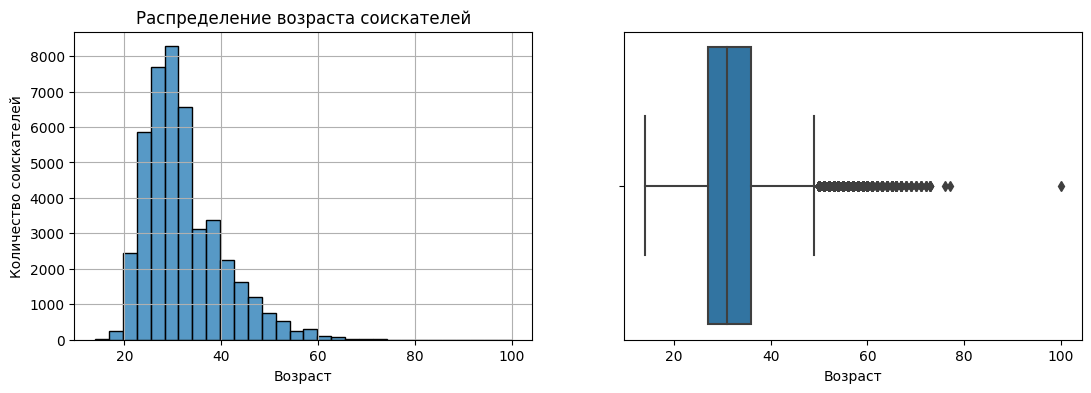

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 4))
plt.subplots_adjust(hspace=0)

# Построение гистограммы
histplot1 = sns.histplot(
    data=hh_df,
    x='Возраст',
    bins=30,
    ax=axes[0],
)

histplot1.grid()
histplot1.set_title('Распределение возраста соискателей')
histplot1.set_xlabel('Возраст')
histplot1.set_ylabel('Количество соискателей')

# Построение коробчатой диаграммы
histplot2 = sns.boxplot(
    data=hh_df,
    x='Возраст',
    orient='h',
    width=0.9
)

# Расчет моды распределения возраста
m_year = hh_df['Возраст'].mode()[0]
print(f'Мода распределения возраста равна {m_year} годам.')

# Информация о максимальном возрасте
max_year = hh_df['Возраст'].max()
print(f'Предельное значение признака "Возраст" составляет {max_year} лет.')

# Статистика признака "Возраст"
display(hh_df.describe().loc[:,['Возраст']])

# Расчет показателя асимметрии распределения возраста
assimetria = np.round(hh_df['Возраст'].skew(), decimals = 2)
print(f'Численный показатель асимметрии распределения составляет: {assimetria}.')

Выводы:
 
Гистограмма и коробчатая диаграмма показывают распределение возраста соискателей. Данная гистограмма отражает логарифмическое нормальное распределение. Распределение имеет правостороннюю асимметрию, так как показатель распределения асимметрии 1.13 - положительный.
1. Мода распределения равна 30 годам.
2. Предельное значение признака "Возраст" составляет 100 лет. Возраст большинства соискателей от 20 до 40 лет.
Межквартильный показатель возраста соискателей находится в промежутке от 27 до 36 лет.
3. Для признака "Возраст" есть одна аномалия. Это соискатель в возрасте 100 лет.

На коробчатой диаграмме можно также увидеть небольшое количество соискателей в возрасте более 50 лет.
___

2. Постройте распределение признака «Опыт работы (месяц)». Опишите распределение, отвечая на следующие вопросы:

- Чему равна мода распределения?
- Каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей?
- Есть ли аномалии для признака? Если есть, то какие значения вы бы причислили к таковым?

Совет:
Постройте гистограмму и коробчатую диаграмму рядом.

Мода распределения опыта работы равна 81 месяц.
Предельное значение признака "Опыт работы (месяц)" составляет 1188 месяцев.


,Опыт работы (месяц)
count,44574.000000
mean,114.418944
std,79.047861
min,1.000000
25%,57.000000
50%,100.000000
75%,154.000000
max,1188.000000


Численный показатель асимметрии распределения составляет: 1.28.


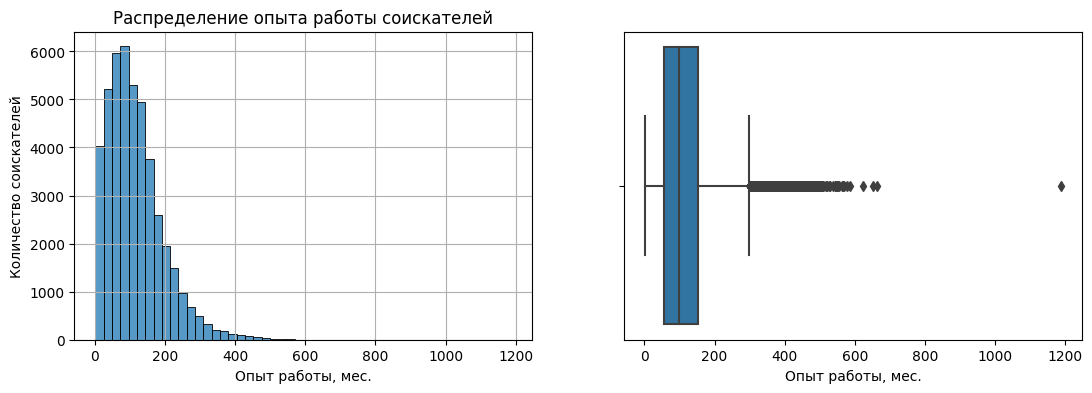

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 4))
plt.subplots_adjust(hspace=0)

# Построение гистограммы
histplot3 = sns.histplot(
    data=hh_df,
    x='Опыт работы (месяц)',
    bins=50,
    ax=axes[0],
)
histplot3.grid()
histplot3.set_title('Распределение опыта работы соискателей')
histplot3.set_xlabel('Опыт работы, мес.')
histplot3.set_ylabel('Количество соискателей')

# Построение коробчатой диаграммы
histplot4 = sns.boxplot(
    data=hh_df,
    x='Опыт работы (месяц)',
    orient='h',
    width=0.9
)
histplot4.set_xlabel('Опыт работы, мес.')

# Расчет моды распределения опыта работы
m_job_months = round(hh_df['Опыт работы (месяц)'].mode()[0])
print(f'Мода распределения опыта работы равна {m_job_months} месяц.')

# Информация о предельном значении опыта работы
max_job_year = round(hh_df['Опыт работы (месяц)'].max())
print(f'Предельное значение признака "Опыт работы (месяц)" составляет {max_job_year} месяцев.')

# Статистическая информация о признаке "Опыт работы (месяц)"
display(hh_df.describe().loc[:,['Опыт работы (месяц)']])

# Расчет показателя асимметрии распределения опыта работы
assimetria_job = np.round(hh_df['Опыт работы (месяц)'].skew(), decimals = 2)
print(f'Численный показатель асимметрии распределения составляет: {assimetria_job}.')

Выводы:
Гистограмма и коробчатая диаграмма показывают распределение опыта работы соискателей. Данная гистограмма отражает логарифмическое нормальное распределение. Распределение имеет правостороннюю асимметрию, так как показатель распределения асимметрии 1.28 - положительный.
1. Мода распределения равна 81 месяцам.
2. Предельное значение признака "Опыт работы" составляет 1188 месяцев. Опыт работы большинства соискателей от 0 до 300 месяцев.
Межквартильный показатель опыта работы соискателей находится в промежутке от 57 до 154 месяцев.
3. Для признака "Опыт работы" есть одна аномалия. Это опыт работы соискателя в 1200 месяцев, что в годах составляет 100 лет. С большой долей вероятности - это ошибочный показатель.

На коробчатой диаграмме можно также увидеть некоторое количество соискателей с опытом работы более 600 месяцев, что составляет более 25 лет.
___

3. Постройте распределение признака «ЗП (руб)». Опишите распределение, отвечая на следующие вопросы:

- Чему равна мода распределения?
- Каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей?
- Есть ли аномалии для признака заработной платы? Если есть, то какие значения вы бы причислили к таковым?
- Определите по графику, сколько соискателей требуют заработную плату выше 1 миллиона рублей.

Совет:
Постройте гистограмму и коробчатую диаграмму рядом.

Мода распределения заработной платы равна 50000 рублей.
Предельное значение признака "ЗП (руб)" составляет 24304876 рублей.
Количество соискателей требующих заработную плату свыше 1 миллиона рублей: 5 человек.


,ЗП (руб)
count,4.474400e+04
mean,7.652146e+04
std,1.359203e+05
min,1.000000e+00
25%,3.708250e+04
50%,5.900000e+04
75%,9.500000e+04
max,2.430488e+07


Численный показатель асимметрии распределения составляет: 131.11.


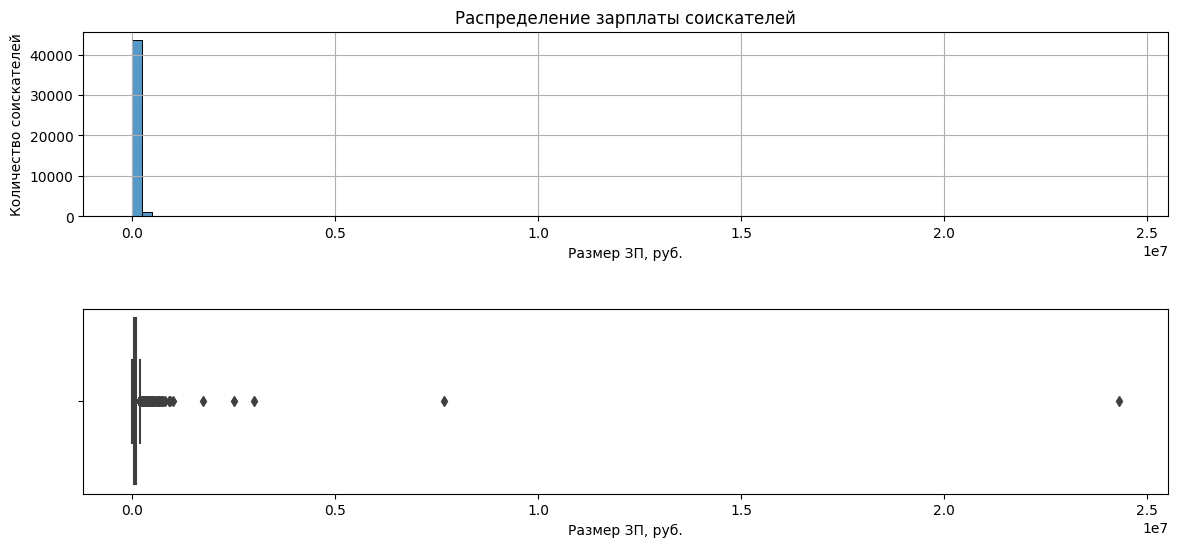

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 6))
plt.subplots_adjust(hspace=0.5)

# Построение гистограммы
histplot5 = sns.histplot(
    data=hh_df,
    x='ЗП (руб)',
    bins=100,
    ax=axes[0],
)
histplot5.grid()
histplot5.set_title('Распределение зарплаты соискателей')
histplot5.set_xlabel('Размер ЗП, руб.')
histplot5.set_ylabel('Количество соискателей')

# Построение коробчатой диаграммы
histplot6 = sns.boxplot(
    data=hh_df,
    x='ЗП (руб)',
    orient='h',
    width=0.9
)
histplot6.set_xlabel('Размер ЗП, руб.')

# Расчет моды распределения заработной платы
m_selery = round(hh_df['ЗП (руб)'].mode()[0])
print(f'Мода распределения заработной платы равна {m_selery} рублей.')

# Информация о максимальном значении ЗП
max_selery = round(hh_df['ЗП (руб)'].max())
print(f'Предельное значение признака "ЗП (руб)" составляет {max_selery} рублей.')

# Расчет количества соискателей требующих заработную плату свыше 1 миллиона рублей
count_selery = round(hh_df[hh_df['ЗП (руб)'] > 1000000])['ЗП (руб)'].count()
print(f'Количество соискателей требующих заработную плату свыше 1 миллиона рублей: {count_selery} человек.')

# Статистика признака ЗП
display(hh_df.describe().loc[:,['ЗП (руб)']])

# Расчет численного показателя асимметрии распределения
assimetria_selery = np.round(hh_df['ЗП (руб)'].skew(), decimals = 2)
print(f'Численный показатель асимметрии распределения составляет: {assimetria_selery}.')

Выводы:

Гистограмма и коробчатая диаграмма показывают распределение размера заработной платы соискателей. Данная гистограмма отражает логарифмическое нормальное распределение. Распределение имеет правостороннюю асимметрию, так как показатель распределения асимметрии 131.11 - положительный.
1. Мода распределения равна 50 000 рублей.
2. Предельное значение признака "ЗП" составляет 24304876 рублей. Размер заработной платы большинства соискателей в пределах 100 000 рублей.
Межквартильный показатель размера заработной платы соискателей находится в промежутке от 37 000 до 95 000 рублей.
3. Для признака "ЗП" есть одна аномалия. Это размер заработной платы соискателя в 24 304 876  рублей. Возможно, что это ошибочный показатель.

На коробчатой диаграмме можно также увидеть 5 соискателей с заработной платой более 200 000 рублей.
___

4. Постройте диаграмму, которая показывает зависимость медианной желаемой заработной платы («ЗП (руб)») от уровня образования («Образование»).

Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 миллиона рублей.

Сделайте выводы по представленной диаграмме:

- Для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы?
- Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?
- Какая категория образования оплачивается выше всех по медианному показателю?

In [55]:
# Расчет медианного показателя заработной платы по уровню образования
hh_df_4 = hh_df[hh_df['ЗП (руб)'] < 1000000].groupby('Образование', as_index=False).median()

# Построение диаграммы
plt.figure(figsize=(13,3))
fig = px.bar(hh_df_4, x='ЗП (руб)', y='Образование', color='Образование', title='Зависимость медианной зарплаты от уровня образования')
fig.show()
fig.write_html("plotly/4_med.salary_exp.html")

C:\Users\tani_\AppData\Local\Temp\ipykernel_12572\3858305089.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<Figure size 1300x300 with 0 Axes>

Выводы:
На диаграмме явно прослеживается зависимость уровня озаработной платы от уровня бразования. 
1. Для соискателей с высшем уровнем образования наблюдается наибольший уровень заработной платы. Это примерно около 60 000 рублей. А для среднего и среднего специального образования уровень желаемой заработной платы наименьший и составляет около 40 000 рублей. 
2. Признак уровня образования при прогнозировании заработной платы является очень важным, так как разность между нименьшим уровнем и наибольшим уровнем заработной платы составляет 20 000 рублей. А в процентном соотношении уровень заработной платы соискателей с высшим образованием больше на 50% заработной платы соискателей с вуровнем образования среднее и среднее специальное.
3. Высшее образования оплачивается выше всех по медианному показателю.
___

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы («ЗП (руб)») в зависимости от города («Город»). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 миллиона рублей.

Сделайте выводы по полученной диаграмме:

- Как соотносятся медианные уровни желаемой заработной платы и их размах в городах?
- Как вы считаете, важен ли признак города при прогнозировании заработной платы?
- В каком городе (категории городов) зафиксирован наибольший показатель желаемой заработной платы (~924 тысячи рублей)?

In [54]:
# Условие для построения диаграммы
hh_df_5 = hh_df[hh_df['ЗП (руб)'] < 1000000].groupby('Город', as_index=False).median()

# Построение диаграммы
fig = plt.figure(figsize=(13,3))
fig = px.bar(hh_df_5, x='ЗП (руб)', y='Город', color='Город', title='Зависимость желаемой заработной платы от города')
fig.show()

# Категория городов, по которой зафиксирован наибольший показатель желаемой заработной платы (~924 тысячи рублей)
hh_df[hh_df['ЗП (руб)'] > 923000][hh_df['ЗП (руб)'] < 925000].groupby('Город', as_index=False)['ЗП (руб)'].value_counts()
fig.write_html("plotly/5_med.salary_city.html")

C:\Users\tani_\AppData\Local\Temp\ipykernel_12572\508880111.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



C:\Users\tani_\AppData\Local\Temp\ipykernel_12572\508880111.py:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



<Figure size 1300x300 with 0 Axes>

Выводы:
На диаграмме четко прослеживается уровень заработной платы от уровня численности населения в городе. Чем больше уровень населения в городе, тем выше заработная плата.
1. Наибольший показатель уровня заработной платы в городе Москва, следуюший за Москвой по уровню заработной платы идет Санкт-Петербург, на последнем месте идут города-миллионники и прочие города. Уровень заработной платы в Москве более чем в 2 раза больше уровня заработной платы в городах-миллионниках и прочих городах. По сравнению с Санкт-Петербургом в Москве заработная плата больше более чем на 30%. В Санкт-Петербурге по сравнению с городами-миллионниками и прочими городами уровень заработной платы больше на 50%. 
2. Признак города при прогнозировании заработной платы очень важен, так как чем больше численность, тем выше заработная плата.
3. В такой категории городов, как прочие, зафиксирован наибольший показатель желаемой заработной платы (~924 тысячи рублей).
___

6. Постройте многоуровневую столбчатую диаграмму, которая показывает зависимость медианной заработной платы («ЗП (руб)») от признаков «Готовность к переезду» и «Готовность к командировкам». Проанализируйте график, сравнив уровень заработной платы по категориям.
- Чему равна желаемая медианная заработная плата соискателей, готовых и к переезду, и к командировкам? Ответ приведите в тысячах, округлив до целого (например, 45).

In [53]:
# Расчет медианной заработной платы по соискателям готовм и к переезду и к командировкам
hh_df_5 = hh_df.groupby(by=['Готовность к переезду','Готовность к командировкам'], as_index=False)['ЗП (руб)'].median()
print(hh_df_5)

# Построение диаграммы
fig = px.bar(
    hh_df_5,
    x='Готовность к переезду',
    y='ЗП (руб)',
    color="Готовность к командировкам",
    barmode='group',
    title='Зависимость медианной заработной платы от готовности к переезду и/или командировкам'
)
fig.show()
fig.write_html("plotly/6_med.salary_move.html")

   Готовность к переезду  Готовность к командировкам  ЗП (руб)
0                  False                       False   40000.0
1                  False                        True   60000.0
2                   True                       False   50000.0
3                   True                        True   65948.0


Выводы:

Столбчатая диаграмма явно показывает увеличение заработной платы при возможности соискателей к переезду (столбец "true"). При анализе показателей о готовности к командировкам также явно прослеживается увеличение заработной платы (красный столбец).
1. Желаемая медианная заработная плата соискателей, готовых и к переезду, и к командировкам составляет 66 тысячи рублей.
___

7. Постройте сводную таблицу, иллюстрирующую зависимость медианной желаемой заработной платы от возраста («Возраст») и образования («Образование»).

По полученной сводной таблице постройте тепловую карту.

Проанализируйте тепловую карту, сравнив показатели внутри групп.
- Для какой категории образования наблюдается самый быстрый карьерный рост (то есть интенсивность роста заработной платы наибольшая)?

Возраст,14,15,16,17,18,19,20,21,22,23,...,67,68,69,70,71,72,73,76,77,100
Образование,,,,,,,,,,,,,,,,,,,,,
высшее,60000.0,NaN,122582.0,90075.5,30000.0,30000.0,30000.0,35000.0,40000.0,45000.0,...,70000.0,79000.0,112500.0,80000.0,75000.0,75000.0,62500.0,45000.0,90000.0,NaN
неоконченное высшее,NaN,NaN,NaN,80000.0,25000.0,30000.0,31000.0,35000.0,40000.0,40000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
среднее,NaN,10000.0,NaN,44000.0,35000.0,45000.0,29000.0,40000.0,40000.0,35000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
среднее специальное,NaN,2000.0,30000.0,25000.0,25151.0,30000.0,30000.0,30000.0,30000.0,35000.0,...,120000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60000.0


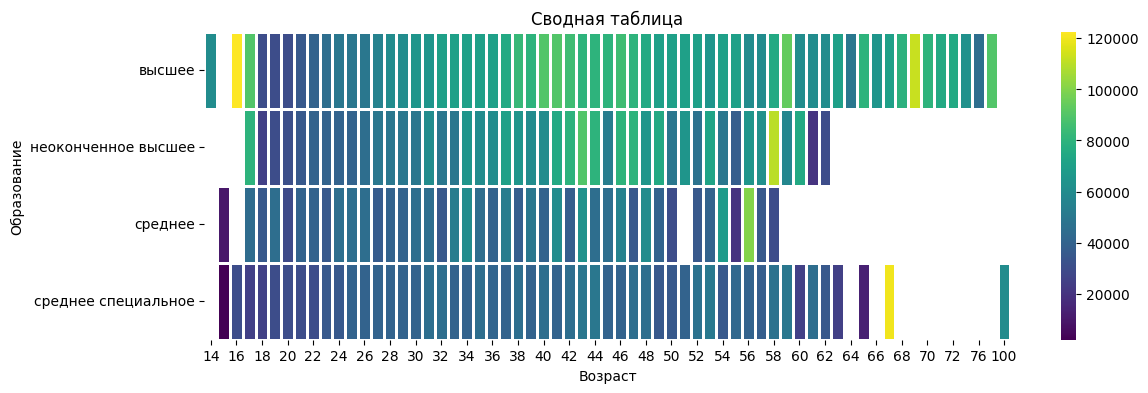

In [26]:
# Построение таблицы зависимости медианной заработной платы
hh_df_7 = hh_df.groupby(by=['Образование','Возраст'], as_index=False)['ЗП (руб)'].median()
hh_df_7 = hh_df_7.pivot_table(values = 'ЗП (руб)', index = 'Образование', columns = 'Возраст', sort=True )
display(hh_df_7)

import plotly.express as px

# Построение диаграммы
fig = plt.subplots(figsize=(13, 4))
hh_data_heatmap = sns.heatmap(
    hh_df_7,
    linewidth=1,
    linecolor='w',
    cmap='viridis',
)
hh_data_heatmap.set_title('Сводная таблица');
hh_data_heatmap.set_xlabel('Возраст');
hh_data_heatmap.set_ylabel('Образование');

Выводы:

На диаграмме прослеживается зависимость заработной платы от возраста и образования соискателя. Чем больше возраст и выше уровень образования, тем выше интенсивность роста заработной платы на диаграмме. Особенно хорошо это видно по соискателям с высшим образованием.

На диаграмме можно увидеть некоторые интересные моменты. К примеру у некототрых соискателей младше 20 лет, указано в резюме, что уже есть высшее образование и размер желаемой заработной платы указан около 120 000 рублей. 

Также можно увидеть, что у соискателей в возрасте около 66 лет со средним специальным образованием уровень желаемой заработной плату указан как один из самых низких - менее 20 000 рублей, иа также как один из самых высоких - около 120 000 рублей. Похожую ситуацию, но с чуть меньшим разбросом заработной платы, можно увидеть и у соискателей со средним уровнем образования в возрасте около 55-56 лет.
___

8. Постройте диаграмму рассеяния, показывающую зависимость опыта работы («Опыт работы (месяц)») от возраста («Возраст»). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе.

Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше неё, — аномалии в наших данных (опыт работы больше либо равен возрасту соискателя).
- Сколько точек лежат строго выше построенной прямой? Так как точки могут сливаться с прямой, то для ответа на этот вопрос проще всего воспользоваться интерактивной визуализацией либо получить таблицу с наблюдениями, лежащими выше прямой с помощью фильтрации.

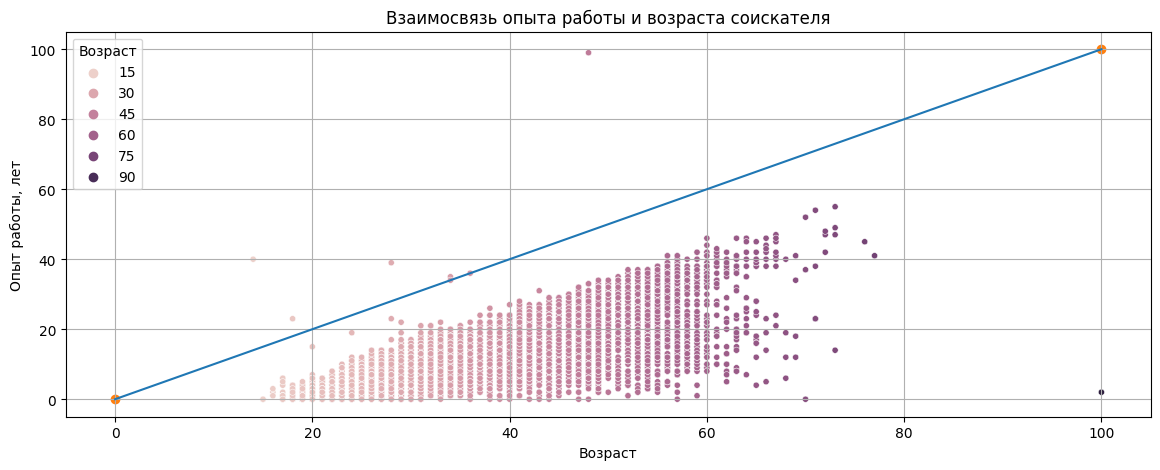

In [27]:
# Пересчет опыта работы в года
hh_df_8 = round(hh_df['Опыт работы (месяц)'] / 12)

# Построение диаграммы
fig = plt.figure(figsize=(14, 5))
scatterplot = sns.scatterplot(
    data=hh_df,
    x='Возраст',
    y=hh_df_8,
    hue='Возраст',
    s=20,
    sizes=(5, 5)
)
scatterplot.set_title('Взаимосвязь опыта работы и возраста соискателя', fontsize=12)
# scatterplot.set_xlabel('Размер зарплаты')
scatterplot.set_ylabel('Опыт работы, лет')
scatterplot.grid()

# Построение прямой
x = [0, 100]
y = [0, 100]
plt.scatter(x, y)
plt.plot(x, y)

Выводы:

На диаграмме рассеяния явно прослеживается увеличения признака "Опыта работы" от признака "Возраст".
1. 7 точек лежат строго выше построенной прямой.
___

ДОПОЛНИТЕЛЬНЫЕ 2 БАЛЛА ЗА ИТОГОВЫЙ ПРОЕКТ

Как вы понимаете, этим наше исследование не ограничивается: его можно значительно расширить. Для получения двух дополнительных баллов по разведывательному анализу постройте ещё два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков.

Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее, в разделе Преобразование данных.

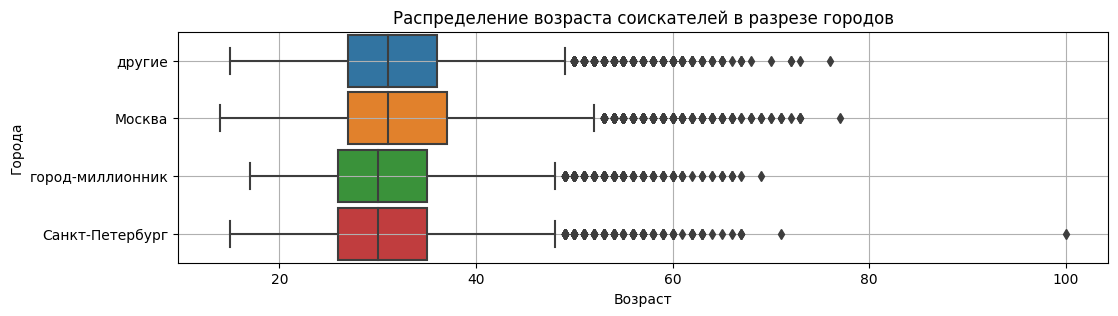

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.__version__
fig = plt.figure(figsize=(12, 3))
boxplot = sns.boxplot(
    data=hh_df,
    y='Город',
    x='Возраст',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение возраста соискателей в разрезе городов');
boxplot.set_xlabel('Возраст');
boxplot.set_ylabel('Города');
boxplot.grid()

Выводы:
1. По данному графику видно, что разброс возраста наибольший по соискателям из Москвы. Межквантильный разброс также наибольший по Москве. По городам-миллионникам и Санкт-Петербургу показателя возраста соискателей практически идентичны.

Text(0, 0.5, 'Опыт работы, лет')

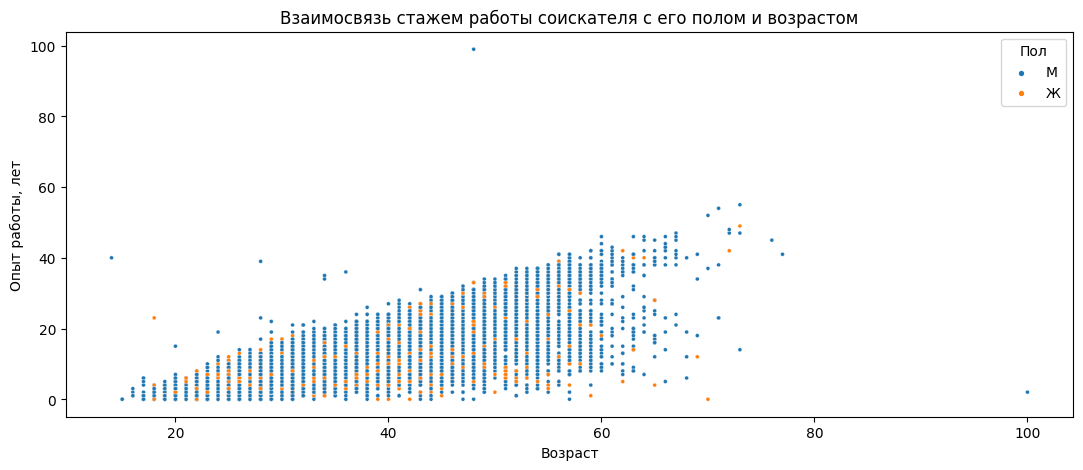

In [29]:
hh_df_10 = round(hh_df['Опыт работы (месяц)'] / 12)
fig = plt.figure(figsize=(13, 5))

scatterplot = sns.scatterplot(
    data=hh_df,
    x='Возраст',
    y=hh_df_10,
    hue='Пол',
    s=100,
    size='Пол',
    sizes=(8, 8)

)
scatterplot.set_title('Взаимосвязь стажем работы соискателя с его полом и возрастом', fontsize=12)
scatterplot.set_xlabel('Возраст')
scatterplot.set_ylabel('Опыт работы, лет')

Выводы:

На данном графике мы видим, что соискатели женского пола в возрасте до 30 лет имеют чуть больше опыта, чем соискатели мужского пола. Возможно, что срок опыта работы у мужчин меньше, чем у женщин, в связи со службой в армии. А после 30-летнего возраста соискателей, ситуация с опытом работы меняется. Уже у мужчин показатель опыта работы увеличивается. Возможно, что это связано с нахождением женщин в дикретных отпусках и в отпусках по уходу за детьми. 

## Очистка данных

1. Когда мы проводили визуальный анализ, мы нашли несколько несостыковок в данных: пропуски, гигантские размеры желаемых заработных плат, резюме людей слишком «преклонного» возраста, опыт работы, превышающий возраст.

Всё это говорит о том, что данные подлежат очистке. Приступим!

Начнём с дубликатов в наших данных. Найдите полные дубликаты в таблице с резюме и удалите их.

- Сколько полных копий удалось найти?

In [30]:
dupl_columns = list(hh_df.columns)
mask = hh_df.duplicated()
hh_duplicates = hh_df[mask]
print(f'Число полных копий: {hh_duplicates.shape[0]}')

#Создадим новую таблицу hh_dedupped, которая будет версией исходной таблицы, очищенной от полных дубликатов
hh_dedupped = hh_df.drop_duplicates(subset=dupl_columns)

Число полных копий: 161


2. Займёмся пропусками. Выведите информацию о числе пропусков в столбцах.

- Сколько пропусков в столбце «Опыт работы (месяц)»?

In [31]:
cols_null = hh_dedupped.isnull().sum()
display(cols_null)
cols_null_or = hh_dedupped['Опыт работы (месяц)'].isnull().sum()
print(f'В столбце "Опыт работы (месяц) {cols_null_or} пропусков.')

Ищет работу на должность:            0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Обновление резюме                    0
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы (месяц)                168
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
частичная занятость                  0
проектная работа                     0
полная занятость                     0
стажировка                           0
волонтерство                         0
гибкий график                        0
полный день                          0
сменный график                       0
вахтовый метод                       0
удаленная работа                     0
ЗП (руб)                             0
dtype: int64

В столбце "Опыт работы (месяц) 168 пропусков.


3. Итак, у нас есть пропуски в трёх столбцах: «Опыт работы (месяц)», «Последнее/нынешнее место работы», «Последняя/нынешняя должность». Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью.

Пропуски в столбце с опытом работы заполните медианным значением.

- Чему равно результирующее среднее значение в столбце «Опыт работы (месяц)» после заполнения пропусков? Ответ округлите до целых.

In [32]:
# Удаление строк в признаках 'Последнее/нынешнее место работы' и 'Последняя/нынешняя должность', в которых есть пропуски
hh_dedupped.dropna(how='any', subset=['Последнее/нынешнее место работы','Последняя/нынешняя должность'], axis=0, inplace=True)

# Создаем словарь имя столбца: число(признак) на который надо заменить пропуски
values = {'Опыт работы (месяц)':hh_dedupped['Опыт работы (месяц)'].median()}

# Заполняем пропуски в соответствии с заявленным словарем
hh_dedupped = hh_dedupped.fillna(values)

# Выводим результирующую долю пропусков
print(hh_dedupped.isnull().mean())

# Расчет среднего значения признака "Опыт работы (месяц)"
average_month = round(hh_dedupped['Опыт работы (месяц)'].mean())
print(f"Cреднее значение признака 'Опыт работы (месяц)' составляет: {round(average_month)}")

Ищет работу на должность:          0.0
Последнее/нынешнее место работы    0.0
Последняя/нынешняя должность       0.0
Обновление резюме                  0.0
Авто                               0.0
Образование                        0.0
Пол                                0.0
Возраст                            0.0
Опыт работы (месяц)                0.0
Город                              0.0
Готовность к переезду              0.0
Готовность к командировкам         0.0
частичная занятость                0.0
проектная работа                   0.0
полная занятость                   0.0
стажировка                         0.0
волонтерство                       0.0
гибкий график                      0.0
полный день                        0.0
сменный график                     0.0
вахтовый метод                     0.0
удаленная работа                   0.0
ЗП (руб)                           0.0
dtype: float64
Cреднее значение признака 'Опыт работы (месяц)' составляет: 114


C:\Users\tani_\AppData\Local\Temp\ipykernel_12572\3560885677.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную.

Удалите резюме, в которых указана заработная плата либо выше 1 миллиона рублей, либо ниже 1 тысячи рублей.

- Сколько выбросов вы нашли?

In [33]:
# Резюме, в которых заработная платы выше 1000000 или ниже 1000 рублей.
high = hh_dedupped[hh_dedupped['ЗП (руб)'] > 1000000]
low = hh_dedupped[hh_dedupped['ЗП (руб)'] < 1000]
print(f'Количество резюме, в которых заработная платы выше 1000000 или ниже 1000 рублей составляет: {low.shape[0]+high.shape[0]} штук.')

# Удаление резюме, проверка числа записей
hh_dedupped = hh_dedupped.drop(low.index, axis=0)
print(f'Результирующее число записей: {hh_dedupped.shape[0]}')
hh_dedupped = hh_dedupped.drop(high.index, axis=0)
print(f'Результирующее число записей: {hh_dedupped.shape[0]}')

Количество резюме, в которых заработная платы выше 1000000 или ниже 1000 рублей составляет: 89 штук.
Результирующее число записей: 44497
Результирующее число записей: 44492


5. В процессе разведывательного анализа мы обнаружили резюме, в которых опыт работы в годах превышал возраст соискателя. Найдите такие резюме и удалите их из данных.
- Сколько выбросов вы нашли?

In [34]:
# Расчет количества резюме соискателей, чей опыт работы превышает возраст.
age_exp = hh_dedupped[hh_dedupped['Опыт работы (месяц)']/12 > hh_dedupped['Возраст']]
age_exp.shape[0] 
print(f'Количества резюме соискателей, чей опыт работы превышает возраст: {age_exp.shape[0]} штук.')

# Удаление резюме, проверка числа записей
hh_dedupped = hh_dedupped.drop(age_exp.index, axis=0)
print(f'Результирующее число записей: {hh_dedupped.shape[0]}')                  

Количества резюме соискателей, чей опыт работы превышает возраст: 7 штук.
Результирующее число записей: 44485


6. В результате анализа мы обнаружили потенциальные выбросы в признаке Возраст. Это оказались резюме людей, чей возраст слишком преклонный для поиска работы.

Построим распределение признака в логарифмическом масштабе. Добавим к графику линии, отображающие среднее и границы интервала метода трёх сигм. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

histplot.axvline(log_age.mean(), color='k', lw=2)

- В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику. Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем "послабление" на 1 сигму (возьмите 4 сигмы) в правую сторону. Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

Число выбросов по методу z-отклонения: 3
Результирующее число записей: 44482
Численный показатель асимметрии распределения составляет: 1.13.


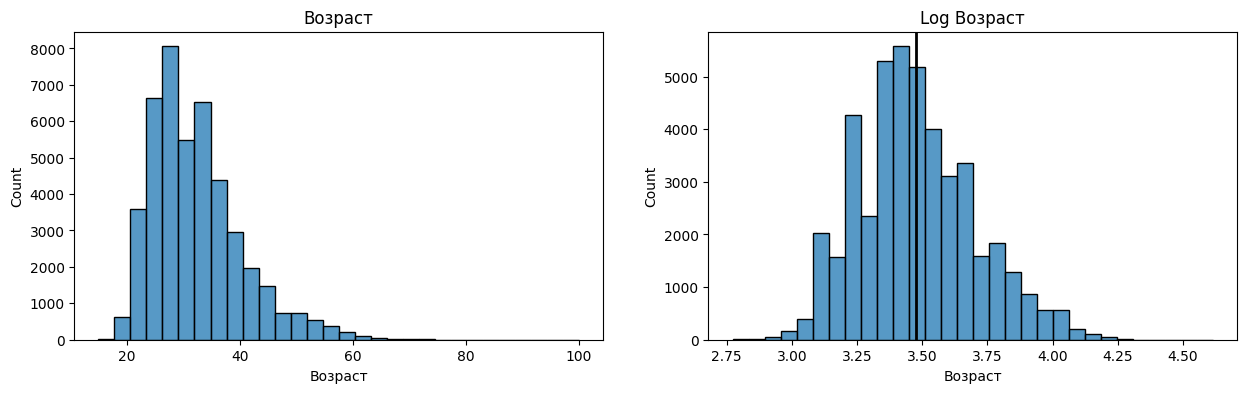

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

#гистограмма исходного признака
histplot = sns.histplot(hh_dedupped['Возраст'], bins=30, ax=axes[0])
histplot.set_title('Возраст')

#гистограмма в логарифмическом масштабе
log_age= np.log(hh_dedupped['Возраст']+1)
histplot = sns.histplot(log_age , bins=30, ax=axes[1])
histplot.set_title('Log Возраст')

# построение линии среднего
histplot.axvline(log_age.mean(), color='k', lw=2)

# Функция для нахождения выбросов с помощью метода z-отклонения и удалим их из данных
def outliers_z_score(data, feature, log_scale=False, bias=0, left=3, right=4):
    if log_scale:
        x = np.log(data[feature]+bias)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

# применение функции
outliers, cleaned = outliers_z_score(hh_dedupped, 'Возраст', left=3, right=4, bias=0, log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

# Расчет показателя асимметрии
assimetria_age = np.round(hh_dedupped['Возраст'].skew(), decimals = 2)
print(f'Численный показатель асимметрии распределения составляет: {assimetria_age}.')

hh_dataframe = cleaned

Выводы:
Гистограмма отражает распределение возраста соискателей. Данная гистограмма отражает логарифмическое нормальное распределение. Распределение имеет правостороннюю асимметрию, так как показатель распределения асимметрии 1.13 - положительный.

1. Число выбросов по методу z-отклонения: 3 соискателя
